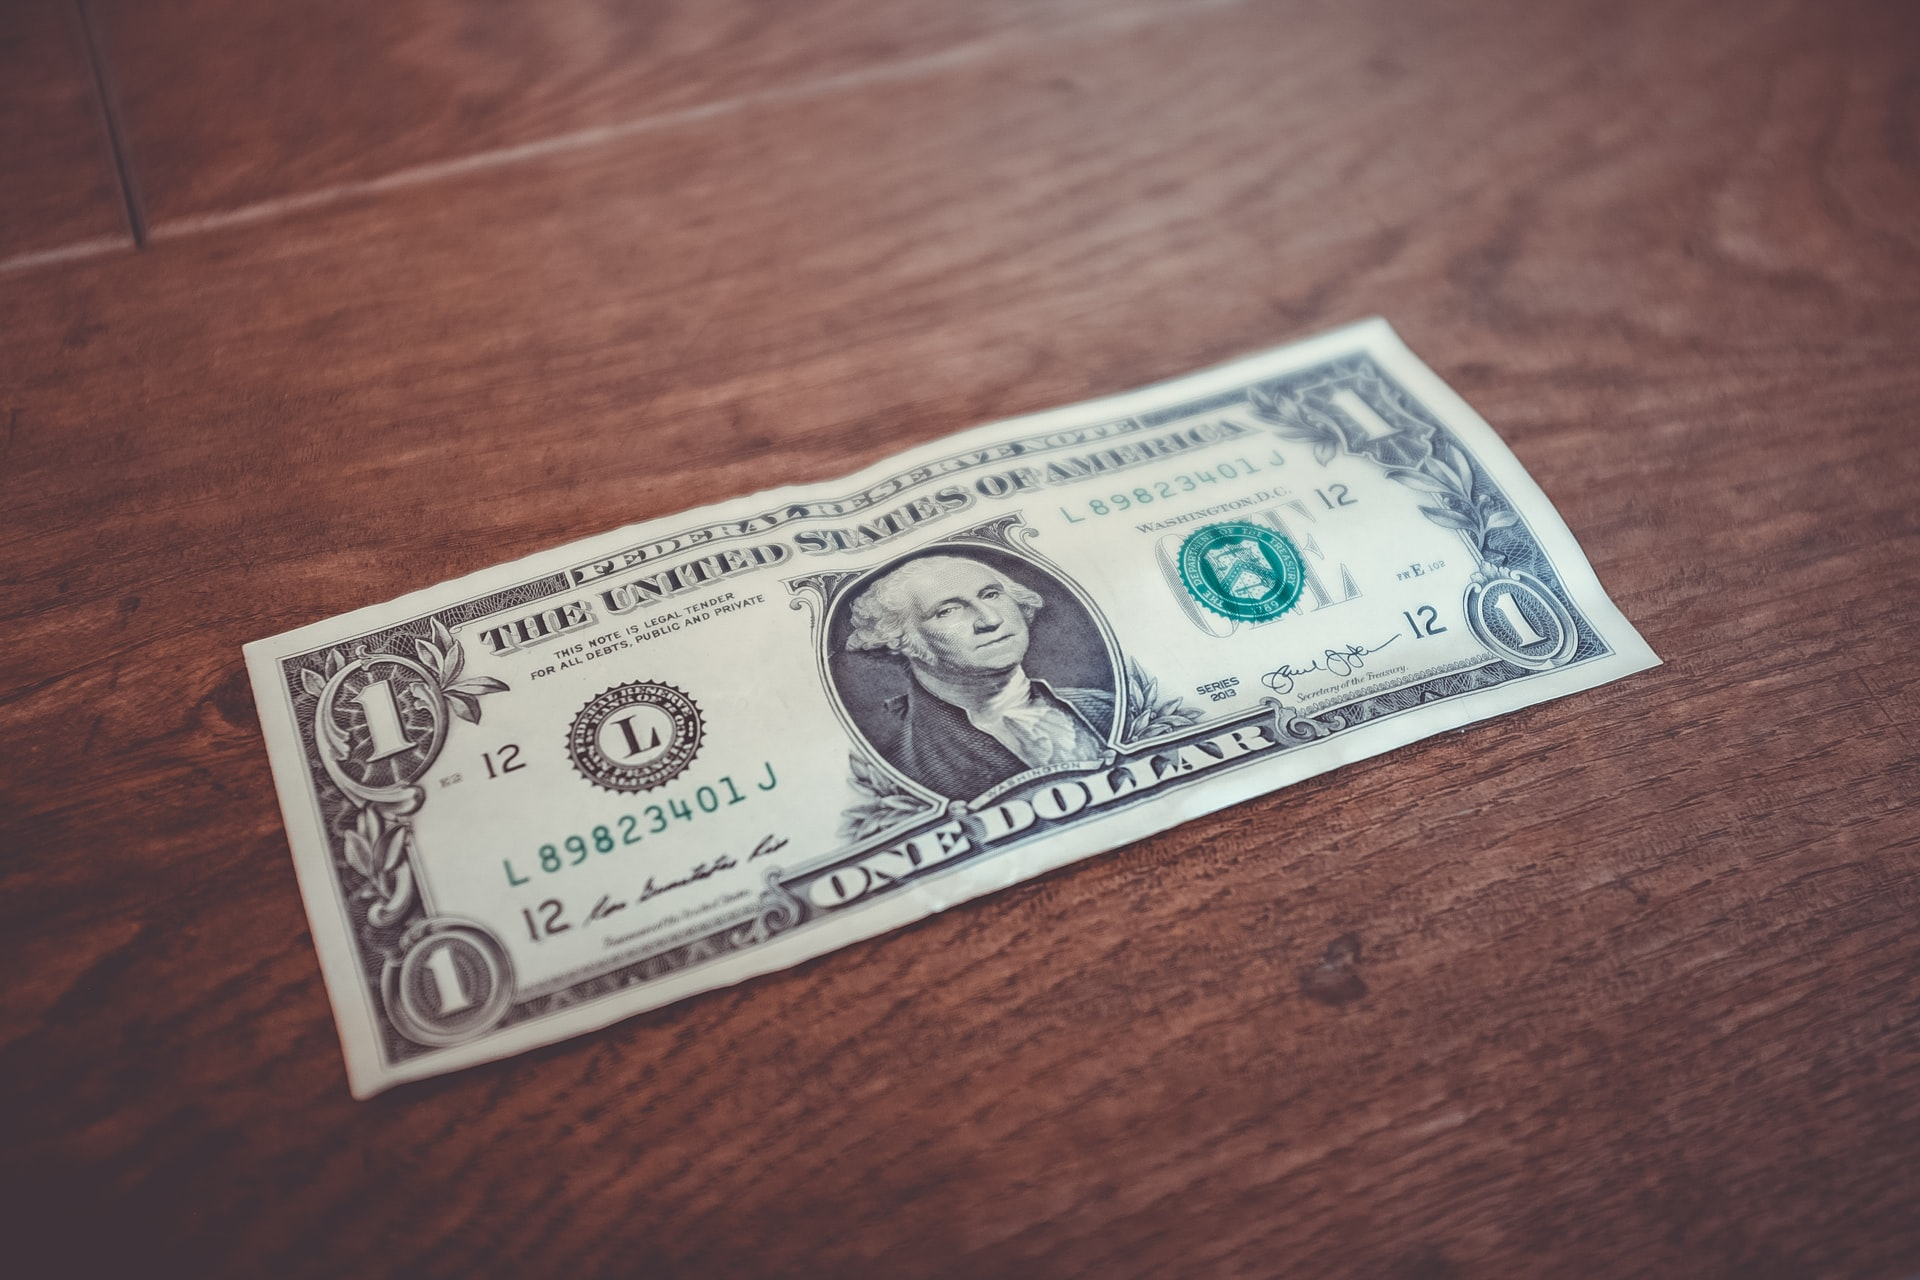

# Introduction

A minimum wage is the **lowest remuneration** that employers can legally pay their workers—the price floor below which workers may not sell their labor. Most countries had introduced minimum wage legislation by the end of the 20th century.

Supply and demand models suggest that there may be **welfare and employment losses from minimum wages**. However, if the labor market is in a state of monopsony (with only one employer available who is hiring), minimum wages can increase the efficiency of the market. There is debate about the full effects of minimum wages.

The dataset provided by Firat Gonen gives us the minimum wage of 31 countries. The minimum wage is yearly in US Dollars.

In [ ]:
#importing some libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import cm
import matplotlib
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)    #THIS LINE IS MOST IMPORTANT AS THIS WILL DISPLAY PLOT ON 
#NOTEBOOK WHILE KERNEL IS RUNNING

import plotly.graph_objects as go

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [ ]:
df = pd.read_csv('../input/minimum-wages-between-2001-2018/MINIMUM_WAGES.csv')
df.head()

Looking at the dataset we have minimum wage data from 2001 to 2018 for 31 countries.

In [ ]:
df.isna().sum()

There are no null values so we saved some time of data cleaning.

In [ ]:
df.Country

These 31 countries seems to be choosen randomly . We dont have data about most south asian countries.

Bar chart race 

In [ ]:
from IPython.core.display import HTML
HTML('''<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/2646190" data-url="https://flo.uri.sh/visualisation/2646190/embed"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

In [ ]:
df2= df.melt(id_vars=["Country"], 
        var_name="Year", 
        value_name="mwage")

In [ ]:
fig = go.Figure(data=go.Heatmap(
                   z= df2['mwage'],
                   x=df2['Year'],
                   y= df2['Country'],
                   hoverongaps = False))
fig.update_layout(
    title_text= ' Minimum Wage Over the Years',
     xaxis = dict(
        tickmode = 'array',
        tickvals = [2001,2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009 ,2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017 , 2018],
        ticktext = ['2001','2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017' , '2018']),
     autosize=False,
    width= 700,
    height=1000,
    paper_bgcolor='rgb(233,233,233)',
    
    )
fig.show()

**Inference**

* Netherlands and Luxemberg had the highest minimum wages over the years.

* Mexico and Russsian Federation had the lowest minimum wages over the years.

* New zealand and UK are continuosly increasing the minimum wage over the years.

In [ ]:
#data for year 2018
df3 = df2[df2.Year == '2018']

#sorting values with mwage

df3 = df3.sort_values('mwage', ascending = False)


In [ ]:
sns.set_context("talk")
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12,12))
ax = sns.barplot(y = 'Country' , x = "mwage", data = df3, palette = 'mako', edgecolor = 'black')
ax.set_title('Minimum Wages (Yearly)' , size = 20, pad = 20)
for p in ax.patches:
        ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

**Minimum Wage Distribution**

In [ ]:
plt.figure(figsize=(12,12), dpi= 80)
sns.set_context("notebook")
plt.style.use('fivethirtyeight')
ax = sns.boxplot(y="Country", x="mwage", data= df2)
ax.set_xlabel('Minimum Wage')
ax.set_ylabel('')
ax.set_title('Minimum Wage Distributuion' , size = 20, pad = 20)

**Conclusion**

* Over the years Korea , Latvia and Poland have made significant changes in Minimum Wage.

* Over the years Mexico's Minimum wage distribution hasn't changed.

# Minimum Wage Correlation with World Development Indicators




In [ ]:
wd = pd.read_csv('../input/world-development-indicators/wdi-csv-zip-57-mb-/WDIData.csv')

In [ ]:
wd.head(5)

In [ ]:
wd = wd.drop(wd.loc[:, 'Indicator Code':'2000'].columns, axis = 1) 
wd = wd.loc[:, ~wd.columns.str.contains('^Unnamed')]

In [ ]:
wd = wd.melt(id_vars=["Country Name", "Country Code", "Indicator Name"], 
        var_name="Year", 
        value_name="Value")

In [ ]:
wd = wd.drop('Country Code' , axis = 1)

In [ ]:
wd = wd.pivot_table('Value', ['Country Name','Year'], 'Indicator Name')

In [ ]:
wd = wd.reset_index()

In [ ]:
new_df = pd.merge(df2, wd,  how='left', left_on=['Country','Year'], right_on = ['Country Name','Year'])


In [ ]:
#dropping na 
thresh = len(new_df) * .2
new_df.dropna(thresh = thresh, axis = 1, inplace = True)

In [ ]:
new_df.isna().sum()

In [ ]:
#correlation of columns
correlation = new_df.corr()
correlation['mwage'].sort_values(ascending=False).head(10)


In [ ]:
correlation['mwage'].sort_values(ascending=False).tail(10)

In [ ]:
mande = new_df.loc[:, new_df.columns.str.contains('employment|wage')]

In [ ]:
correlation = mande.corr()
correlation['mwage'].sort_values(ascending=False).head(10)

In [ ]:
correlation['mwage'].sort_values(ascending=False).tail(10)